## Task2

In [1]:
#Task 2 : Find bias for the given dataset

#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from scipy.signal import find_peaks
from scipy import signal


# Load the uploaded dataset and image
file_path = "task2-data.csv"
image = imread('eggPositions_in_one Tray.png')
df = pd.read_csv(file_path, delimiter= ';', decimal= ',')
df = df.drop(columns=["Unnamed: 4"])


### 1. Egg position vs Volume of egg as estimated from Algorithm 1 and 2

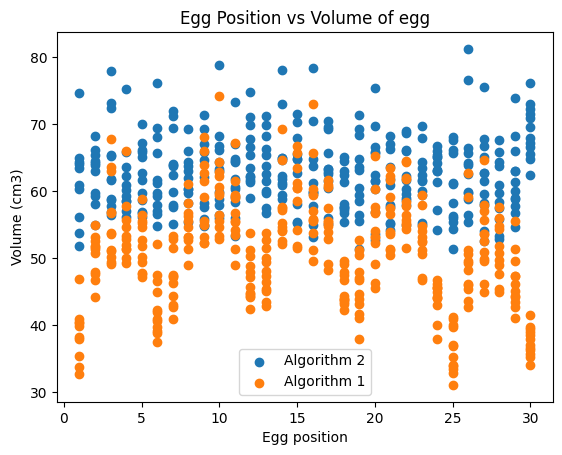

In [2]:
# 1. Plot
fig, ax = plt.subplots()
vol_1 = ax.scatter(df['Egg Position'] , df['Volume (cm3) - Algorithm 2'], label = 'Algorithm 2')
vol_2 = ax.scatter(df['Egg Position'] , df['Volume (cm3) - Algorithm 1'], label = 'Algorithm 1')
ax.set_title('Egg Position vs Volume of egg')
ax.set_xlabel('Egg position')
ax.set_ylabel('Volume (cm3)')
ax.legend(loc = 'best')

The above plot shows that Algorithm 1 is biased downwards compared to Algorithm 2.

### 2. Sort data according to egg position and analyse the volume difference between the two algorithms

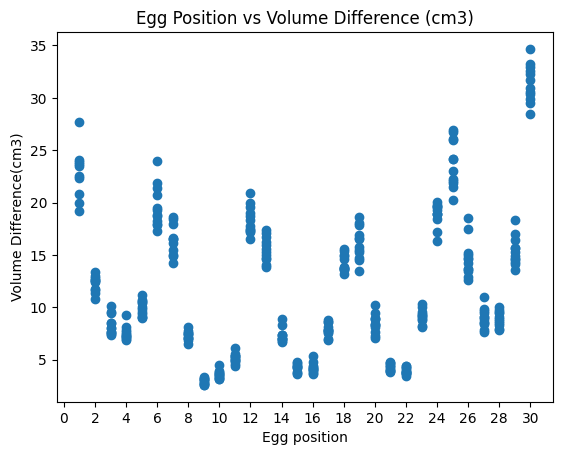

In [3]:
#Sort data according to egg position 
df_sort = df.sort_values(by=['Egg Position'])
# Find differnece between volume esitmated from algoruthm 1 and volume esitmated from algorithm 2  
df_sort['Algo_Difference'] = df_sort['Volume (cm3) - Algorithm 2']- df_sort['Volume (cm3) - Algorithm 1']


plt.scatter(df_sort['Egg Position'] , df_sort['Algo_Difference'])

plt.title('Egg Position vs Volume Difference (cm3)')
plt.xlabel('Egg position')
plt.ylabel('Volume Difference(cm3)')
plt.xticks(np.arange(0,31,step =2))
plt.show()

From the above plot, it is clear that the Volume differnece between the two algorithms has peaks and troughs.
Lets take a set of eggs (egg position 1 to 30) as an example and analyse the volume difference


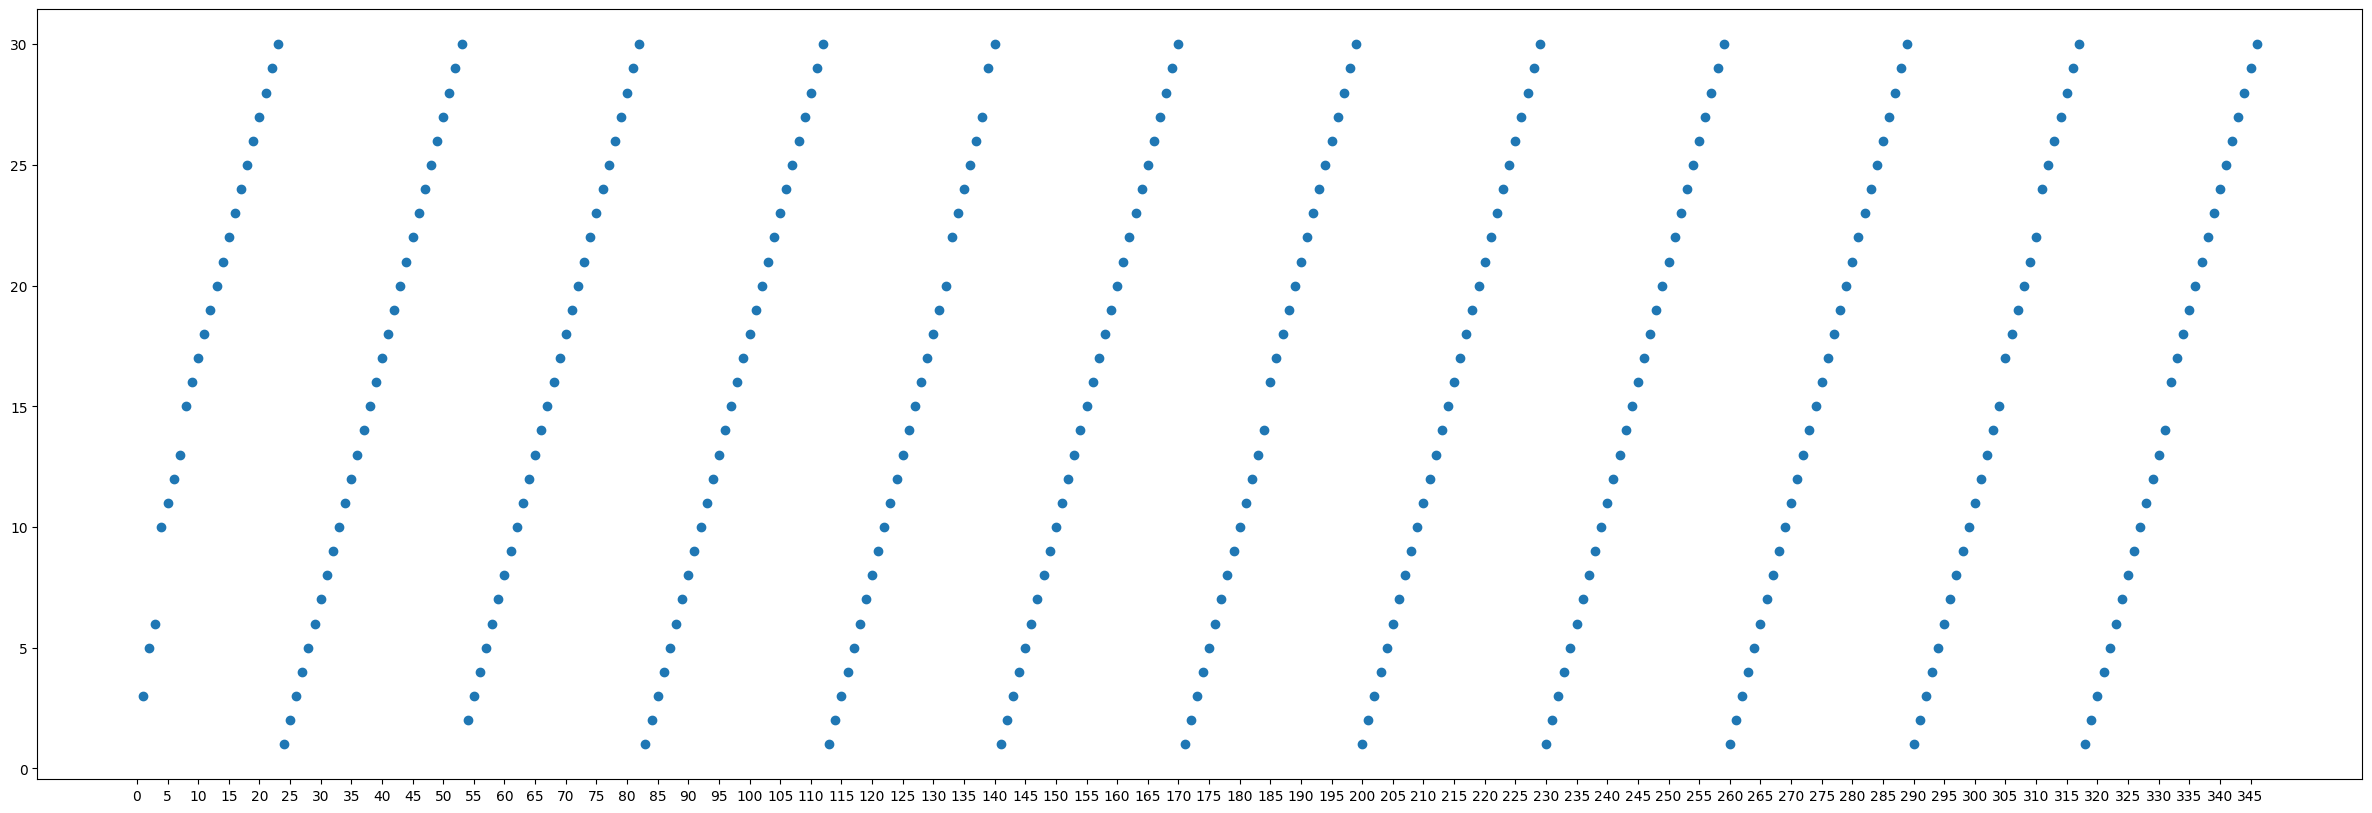

In [5]:
# Plot to analyse which slice of dataset has all 30 positions
plt.figure(figsize=(30, 10)) 
plt.scatter(df['Egg Number'], df['Egg Position'])
plt.xticks(np.arange(0,350, step = 5))
       
plt.show()

Some data seems to be missing for some egg positions.

### 3. Take a set of eggs starting from position 1 till 30 as an example for analysis

In [6]:
# Find indexes of set of eggs starting from position 1 till 30
index_max = df.index[df['Egg Position']== 30]
diff_30 = index_max.diff().tolist()
index_start = [int(index_max[i-1])+1 for i in range(len(diff_30)) if diff_30[i] == 30]
index_end = [x+30 for x in index_start]


In [7]:
# Dataframe for a set of eggs
example_set = 5
df_set = df[index_start[example_set]:index_end[example_set]]
df_set.loc[:, ('Algo_Difference')] = df_set['Volume (cm3) - Algorithm 2']- df_set['Volume (cm3) - Algorithm 1']
#df_set['Algo_Difference'] = df_set['Volume (cm3) - Algorithm 2']- df_set['Volume (cm3) - Algorithm 1']

/var/folders/z7/x7mmf6vs5_1996cqtr5kzqxm0000gn/T/ipykernel_56900/3515514242.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_set.loc[:, ('Algo_Difference')] = df_set['Volume (cm3) - Algorithm 2']- df_set['Volume (cm3) - Algorithm 1']


### 4. Heatmap visualisation showing the Volume difference with respect to the position of eggs for a set of eggs 

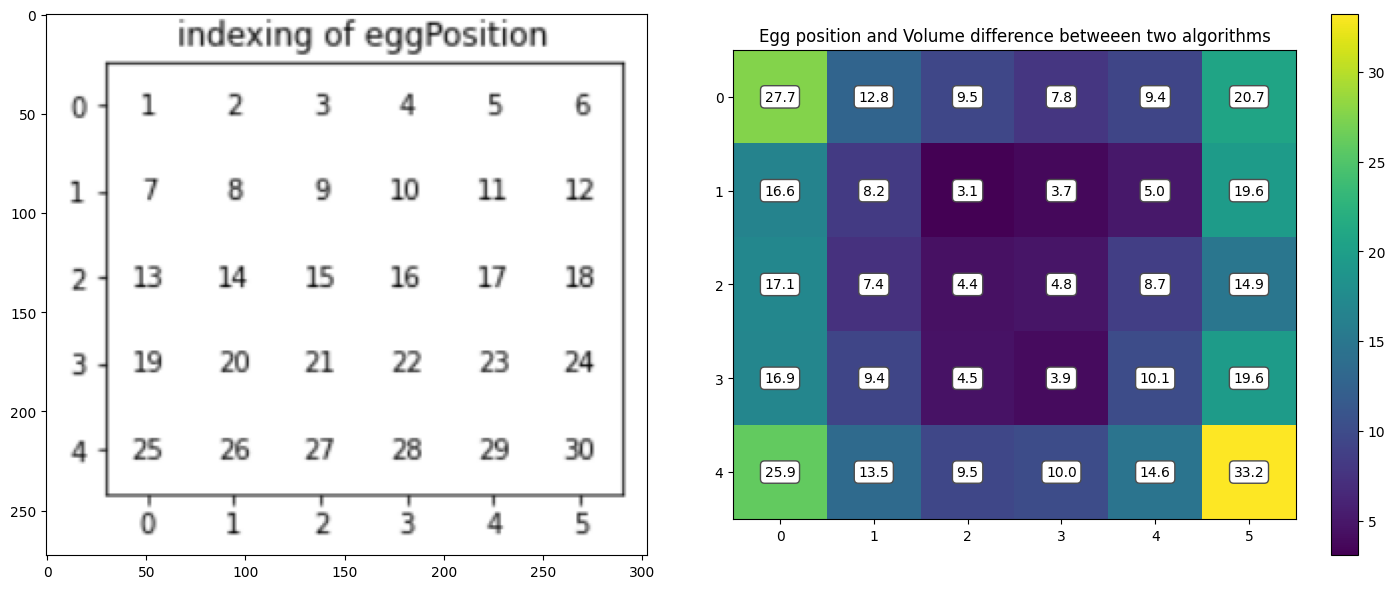

In [8]:
# Heat map visualisation - Volume difference and the position of eggs
difference_matrix = np.array(df_set['Algo_Difference']).reshape(5,6)
fig, ax = plt.subplots(1,2, figsize=(15, 6))
# Egg position image
ax[0].imshow(image)
heatmap = ax[1].imshow(difference_matrix)
#Heatmap showing volume difference between two algorithms
ax[1].set_title('Egg position and Volume difference betweeen two algorithms')

for (i, j), z in np.ndenumerate(difference_matrix):
    ax[1].text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
cbar = fig.colorbar(heatmap, orientation='vertical')


plt.tight_layout()
plt.show()

In the left is the image as given in the task describing the position of eggs in a tray. On the right is a heatmap showing the volume difference between two algorithms.
- The Volume difference is biased based on the position of the egg.
- The volume difference between the two algorithms is higher (above 20 cm3) on the corners i.e positions 1, 6, 25 and 30
- The volume difference between the two algorithms is lower - less than 12 cm3 in the  center i.e positions 3,4,8-11,14-17,20-23,27 and 28
- The rest of the positions - 7, 13, 19, 12, 18 and 24 , the difference is medium.
  

### 5. Conclusion :

- Algorithm 1 is biased downwards compared to Algorithm 2
- Volume difference between the two algorithms is biased based on the position of the egg.